In [ ]:
#load the required datasets
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("diamonds_messy.csv")

In [2]:
#extract Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1010 non-null   int64  
 1   carat       956 non-null    float64
 2   cut         980 non-null    object 
 3   price       983 non-null    float64
 4   x           954 non-null    float64
 5   y           936 non-null    object 
 6   z           1005 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.4+ KB


In [3]:
#To describe the dataset
data.describe()

,Unnamed: 0,carat,price,x,z
count,1010.000000,956.000000,983.000000,954.000000,1005.000000
mean,504.500000,0.798619,3873.476094,11.991488,3.499025
std,291.706188,0.453739,3832.384655,173.571064,0.784573
min,0.000000,0.200000,367.000000,-123.000000,0.000000
25%,252.250000,0.400000,973.000000,4.732500,2.930000
50%,504.500000,0.710000,2551.000000,5.730000,3.540000
75%,756.750000,1.040000,5135.500000,6.540000,4.020000
max,1009.000000,2.470000,18480.000000,5304.000000,5.390000


In [4]:
#extract 1st 5 rows from dataset 
data.head(5)

,Unnamed: 0,carat,cut,price,x,y,z
0,0,2.19,Good,13978.0,8.26,8.17,5.23
1,1,1.22,Ideal,5099.0,6.89,6.95,4.22
2,2,0.70,Ideal,2874.0,5.77,5.73,3.51
3,3,0.40,Very Good,1033.0,NaN,4.76,2.90
4,4,1.03,Ideal,5037.0,6.54,6.5,3.97


In [5]:
#extract last 5 rows from dataset 
data.tail(5)

,Unnamed: 0,carat,cut,price,x,y,z
1005,1005,1.08,Ideal,5172.0,6.54,6.61,4.07
1006,1006,0.53,Very Good,1852.0,5.28,5.39,3.12
1007,1007,1.60,Premium,10064.0,7.54,7.49,4.65
1008,1008,0.30,Premium,776.0,4.35,NaN,2.63
1009,1009,0.46,Very Good,1345.0,5.05,5.1,2.99


In [6]:
#columns of dataset
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'price', 'x', 'y', 'z'], dtype='object')

In [7]:
#find shape of column
data.shape

(1010, 7)

In [8]:
#find the data type of each column
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
price         float64
x             float64
y              object
z             float64
dtype: object

In [9]:
#Find missing values and repace with suitable alternative
data.isnull()
sum_of_missing_val=data.isnull().sum()
print(sum_of_missing_val)

Unnamed: 0     0
carat         54
cut           30
price         27
x             56
y             74
z              5
dtype: int64


In [10]:
#replace missing values with mean val
##data["x"].fillna(data["x"].mean(),inplace=True)

data.fillna(data.mean(),inplace=True)         #fill numeric column with mean val

data.fillna(data.mode().iloc[0],inplace=True) #fill catogorical column with mode

C:\Users\Sai\AppData\Local\Temp\ipykernel_58288\333135775.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(),inplace=True)         #fill numeric column with mean val


In [11]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
price         0
x             0
y             0
z             0
dtype: int64

In [12]:
#Find mean, median and mode
print("Mean value: ",data.mean())   #mean-->avg val
print("Median value: ",data.median())  #median-->middle val
print("Mode value: ",data.mode().iloc[0])    #mode-->most frequently occures val

Mean value:  Unnamed: 0     504.500000
carat            0.798619
price         3873.476094
x               11.991488
z                3.499025
dtype: float64
Median value:  Unnamed: 0     504.50
carat            0.73
price         2676.00
x                5.79
z                3.54
dtype: float64
Mode value:  Unnamed: 0              0
carat            0.798619
cut                 Ideal
price         3873.476094
x               11.991488
y                    4.31
z                    2.69
Name: 0, dtype: object


C:\Users\Sai\AppData\Local\Temp\ipykernel_58288\1245887803.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Mean value: ",data.mean())   #mean-->avg val
C:\Users\Sai\AppData\Local\Temp\ipykernel_58288\1245887803.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Median value: ",data.median())  #median-->middle val


In [13]:
# Remove the inconsistency from dataset
data=data.drop_duplicates()

In [14]:
data.shape

(1010, 7)

In [15]:
#finding out zeros in dataset
(data==0).sum()

Unnamed: 0     1
carat          0
cut            0
price          0
x              1
y              0
z             14
dtype: int64

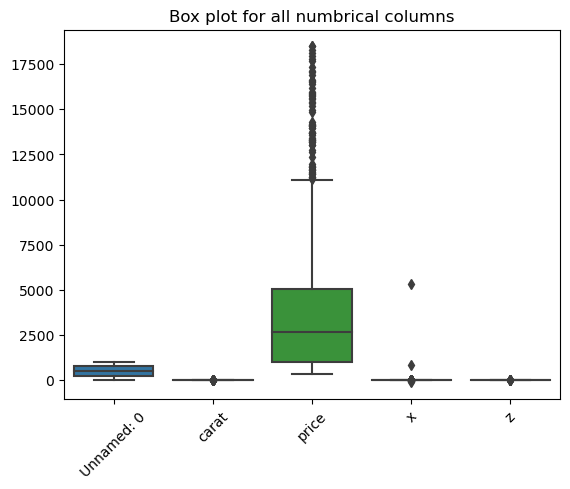

In [18]:
#Box plot-->represent using 5 number summary(i.e min, Q1, median, Q3, max)

numbrical_column=data.select_dtypes(include=["number"])
sns.boxplot(data=numbrical_column)
plt.title("Box plot for all numbrical columns")
plt.xticks(rotation=45)
plt.show()


In [19]:
#Find outliers in each attribute
##detect outliers using IQR
Q1=data["price"].quantile(0.25)
Q3=data["price"].quantile(0.75)
IQR=Q3-Q1

In [20]:
print(Q1)
print(Q3)

1003.5
5051.75


In [21]:
print(IQR)         #------> IQR: use to find extream values or outliers. IQR is the represents the range within which the central 50% of the data falls.

4048.25


In [22]:
#define outlier limit
lower_bound=Q1-1.5*IQR
upper_bound=Q3-1.5*IQR


In [23]:
print(lower_bound)
print(upper_bound)

-5068.875
-1020.625


In [24]:
#Find outliers                                                                
outliers=data[(data["price"]<lower_bound) | (data["price"]>upper_bound)]
print(outliers)

      Unnamed: 0  carat        cut    price          x     y     z
0              0   2.19       Good  13978.0   8.260000  8.17  5.23
1              1   1.22      Ideal   5099.0   6.890000  6.95  4.22
2              2   0.70      Ideal   2874.0   5.770000  5.73  3.51
3              3   0.40  Very Good   1033.0  11.991488  4.76  2.90
4              4   1.03      Ideal   5037.0   6.540000   6.5  3.97
...          ...    ...        ...      ...        ...   ...   ...
1005        1005   1.08      Ideal   5172.0   6.540000  6.61  4.07
1006        1006   0.53  Very Good   1852.0   5.280000  5.39  3.12
1007        1007   1.60    Premium  10064.0   7.540000  7.49  4.65
1008        1008   0.30    Premium    776.0   4.350000  4.31  2.63
1009        1009   0.46  Very Good   1345.0   5.050000   5.1  2.99

[1010 rows x 7 columns]


Any value below the lower bound is considered a low outlier.
Any value above the upper bound is considered a high outlier.

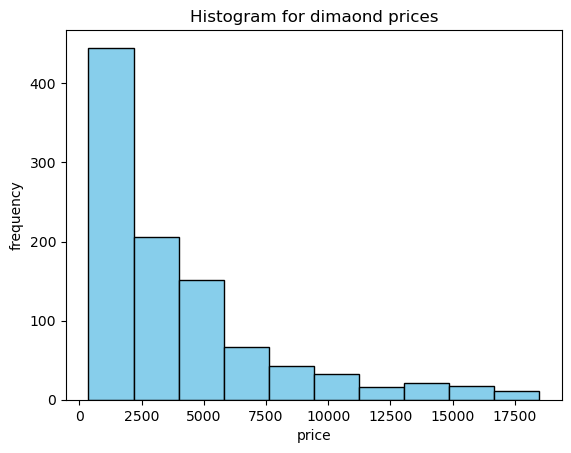

In [28]:
# Histogram 
plt.hist(data["price"],color='skyblue',edgecolor='black')
plt.xlabel("price")
plt.ylabel("frequency")
plt.title("Histogram for dimaond prices")
plt.show()
#print(data.dtypes)

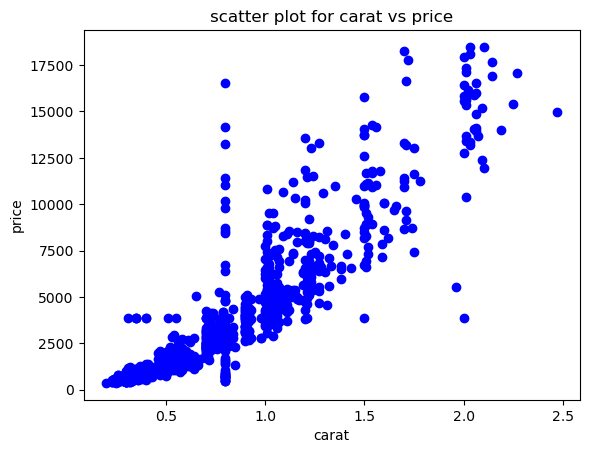

In [36]:
# Scatter plot
plt.scatter(data['carat'],data['price'],color='blue')
plt.xlabel('carat')
plt.ylabel('price')
plt.title('scatter plot for carat vs price')
plt.show()